In [ ]:
#导入第三方库
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
#设置中文编码和负号的正常显示
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [ ]:
#探索年龄分布 :不同年龄段的人数  数据来自用户表。
#用户性别探索 ： 不同性别用户数  数据来自用户表。
#直播间用户打分分析 ：   打分平均和打分次数直方图  数据来自放映表关联打分表。
#用户浏览直播间分析 :
#浏览量和打分值相关性分析:


In [ ]:
# 1、数据读入*********************************************************************************
ratings_df = pd.read_csv("../datas/studiodata/ratings.dat",sep='::',engine='python', names=['user_id','studio_id','rating','ts'])
# 1::1193::5::978300760 
# 用户,直播间id,评分，时间
studio_df = pd.read_csv("../datas/studiodata/studio_info.dat",sep='::', engine='python', names=['studio_id','title','genres'])
# 1::Toy Story (1995)::Animation|Children's|Comedy
# 直播间id,影片名称，类型
user_df = pd.read_csv('../datas/studiodata/user_info.dat', sep='::', engine='python', names=['user_id','sex','age','regionName','zipCode'])
# 1::F::1::10::48067
# 用户id,性别,年龄,区域,邮编

In [ ]:
# 2、数据清洗转换*********************************************************************************
# 用户年龄段探索
# user_df.loc[(user_df['age'] < 18), 'age_range'] = 1
# user_df.loc[((user_df['age'] >= 18) & (user_df['age'] < 24)), 'age_range'] = 2
# user_df.loc[((user_df['age'] >= 25) & (user_df['age'] < 34)), 'age_range'] = 3
# user_df.loc[((user_df['age'] >= 35) & (user_df['age'] < 44)), 'age_range'] = 4
# user_df.loc[((user_df['age'] >= 45) & (user_df['age'] < 60)), 'age_range'] = 5
# user_df.loc[(user_df['age'] >= 60), 'age_range'] = 6

bins = [0, 17, 24, 34, 44, 60, float('inf')]  # 定义年龄范围分隔值
labels = [1, 2, 3, 4, 5, 6]  # 定义新年龄段字段标签
user_df['age_range'] = pd.cut(user_df['age'], bins=bins, labels=labels)

In [ ]:
fig = plt.figure(figsize= (10, 6))
x = np.array(["<18","18-24","25-34","35-44","45-60",">=60"])

# y = np.array([user_df[user_df['age_range'] == 1]['age_range'].count(),
#               user_df[user_df['age_range'] == 2]['age_range'].count(),
#               user_df[user_df['age_range'] == 3]['age_range'].count(),
#               user_df[user_df['age_range'] == 4]['age_range'].count(),
#               user_df[user_df['age_range'] == 5]['age_range'].count(),
#               user_df[user_df['age_range'] == 6]['age_range'].count(),
#              ])

y = user_df['age_range'].value_counts() # TODO 这个分组计数，不考虑年龄段人数为0的统计情况
plt.bar(x, y, label='people count')
plt.legend()
plt.title('people age range')

In [ ]:
# 2、按照性别探索
x = np.array(["female","male"])
# y = np.array([user_df[user_df['sex'] == "M"]['sex'].count(),
#               user_df[user_df['sex'] == "F"]['sex'].count()])
# y = user_df.groupby('sex')['user_id'].count().values
y = user_df['sex'].value_counts().values
plt.bar(x, y,  label='people sexual')
# plt.xticks(yy.index,['male','female'])
plt.legend()
plt.title('people sex range')

In [66]:
# 观影分析： 直播间id,影片名称，类型 + 用户,直播间id,评分，时间 
studio_merge_df = studio_df.merge(ratings_df, on='studio_id')
studio_merge_df

studio_id                  title                       genres  \
0                1       Toy Story (1995)  Animation|Children's|Comedy   
1                1       Toy Story (1995)  Animation|Children's|Comedy   
2                1       Toy Story (1995)  Animation|Children's|Comedy   
3                1       Toy Story (1995)  Animation|Children's|Comedy   
4                1       Toy Story (1995)  Animation|Children's|Comedy   
...            ...                    ...                          ...   
1000204       3952  Contender, The (2000)               Drama|Thriller   
1000205       3952  Contender, The (2000)               Drama|Thriller   
1000206       3952  Contender, The (2000)               Drama|Thriller   
1000207       3952  Contender, The (2000)               Drama|Thriller   
1000208       3952  Contender, The (2000)               Drama|Thriller   

         user_id  rating          ts  
0              1       5   978824268  
1              6       4   978237008  
2              8       4   978233496  
3              9       5   978225952  
4             10       5   978226474  
...          ...     ...         ...  
1000204     5812       4   992072099  
1000205     5831       3   986223125  
1000206     5837       4  1011902656  
1000207     5927       1   979852537  
1000208     5998       4  1001781044  

[1000209 rows x 6 columns]

In [67]:
# 计算每个电影的打分平均
studio_avgration_df = studio_merge_df.groupby('title')['rating'].mean().sort_values(ascending=False)
studio_avgration_df =studio_avgration_df .reset_index().rename(columns={'rating':'AvgRating'})

# 计算每个电影的打分次数
studio_count_df = studio_merge_df.groupby('title')['rating'].count().sort_values(ascending=False).reset_index().rename(columns={'rating':'CountRating'})


In [68]:
studio_merge_df = studio_merge_df.merge(studio_avgration_df, on='title', how='left')
studio_merge_df = studio_merge_df.merge(studio_count_df, on='title', how='left')
studio_merge_df

studio_id                  title                       genres  \
0                1       Toy Story (1995)  Animation|Children's|Comedy   
1                1       Toy Story (1995)  Animation|Children's|Comedy   
2                1       Toy Story (1995)  Animation|Children's|Comedy   
3                1       Toy Story (1995)  Animation|Children's|Comedy   
4                1       Toy Story (1995)  Animation|Children's|Comedy   
...            ...                    ...                          ...   
1000204       3952  Contender, The (2000)               Drama|Thriller   
1000205       3952  Contender, The (2000)               Drama|Thriller   
1000206       3952  Contender, The (2000)               Drama|Thriller   
1000207       3952  Contender, The (2000)               Drama|Thriller   
1000208       3952  Contender, The (2000)               Drama|Thriller   

         user_id  rating          ts  AvgRating  CountRating  
0              1       5   978824268   4.146846         2077  
1              6       4   978237008   4.146846         2077  
2              8       4   978233496   4.146846         2077  
3              9       5   978225952   4.146846         2077  
4             10       5   978226474   4.146846         2077  
...          ...     ...         ...        ...          ...  
1000204     5812       4   992072099   3.780928          388  
1000205     5831       3   986223125   3.780928          388  
1000206     5837       4  1011902656   3.780928          388  
1000207     5927       1   979852537   3.780928          388  
1000208     5998       4  1001781044   3.780928          388  

[1000209 rows x 8 columns]

In [69]:
colnm = studio_merge_df.columns.tolist()
#print(colnm) #['studio_id', 'title', 'genres', 'user_id', 'rating', 'ts', 'AvgRating', 'CountRating']
# plt.figure(figsize = (5, 4))
# color = sns.color_palette()
# color

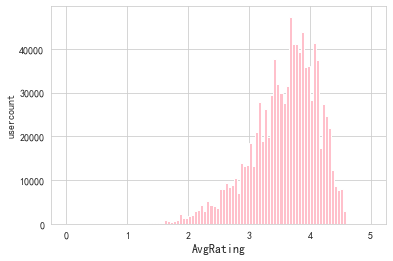

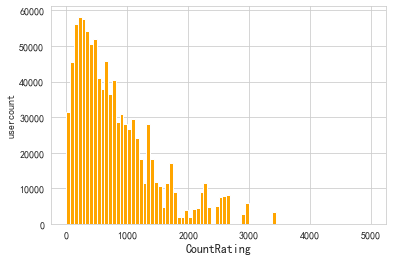

In [59]:
# 电影观影评分分 和 打分次数直方图
studio_merge_df[colnm[6]].hist(range=[0,5],bins = 100,color = 'pink')
plt.xlabel(colnm[6],fontsize = 12)
plt.ylabel('usercount')
plt.show()
studio_merge_df[colnm[7]].hist(range=[0,5000],bins = 80,color = 'orange')
plt.xlabel(colnm[7],fontsize = 12)
plt.ylabel('usercount')
plt.show()

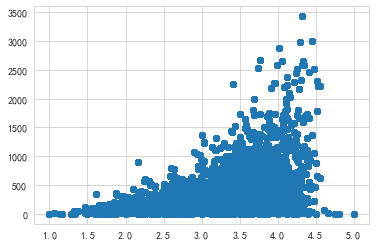

In [62]:
# 电影 打分次数与打分平均的关系
plt.scatter(studio_merge_df['AvgRating'], studio_merge_df['CountRating'])
plt.show()

In [70]:
# 打分+电影 宽表 关联用户表
studio_merge_df = studio_merge_df.merge(user_df, on='user_id', how='left')
studio_merge_df

studio_id                  title                       genres  \
0                1       Toy Story (1995)  Animation|Children's|Comedy   
1                1       Toy Story (1995)  Animation|Children's|Comedy   
2                1       Toy Story (1995)  Animation|Children's|Comedy   
3                1       Toy Story (1995)  Animation|Children's|Comedy   
4                1       Toy Story (1995)  Animation|Children's|Comedy   
...            ...                    ...                          ...   
1000204       3952  Contender, The (2000)               Drama|Thriller   
1000205       3952  Contender, The (2000)               Drama|Thriller   
1000206       3952  Contender, The (2000)               Drama|Thriller   
1000207       3952  Contender, The (2000)               Drama|Thriller   
1000208       3952  Contender, The (2000)               Drama|Thriller   

         user_id  rating          ts  AvgRating  CountRating sex  age  \
0              1       5   978824268   4.146846         2077   F    1   
1              6       4   978237008   4.146846         2077   F   50   
2              8       4   978233496   4.146846         2077   M   25   
3              9       5   978225952   4.146846         2077   M   25   
4             10       5   978226474   4.146846         2077   F   35   
...          ...     ...         ...        ...          ...  ..  ...   
1000204     5812       4   992072099   3.780928          388   F   25   
1000205     5831       3   986223125   3.780928          388   M   25   
1000206     5837       4  1011902656   3.780928          388   M   25   
1000207     5927       1   979852537   3.780928          388   M   35   
1000208     5998       4  1001781044   3.780928          388   M   18   

         regionName zipCode age_range  
0                10   48067         1  
1                 9   55117         5  
2                12   11413         3  
3                17   61614         3  
4                 1   95370         4  
...             ...     ...       ...  
1000204           7   92120         3  
1000205           1   92120         3  
1000206           7   60607         3  
1000207          14   10003         4  
1000208           4   61820         2  

[1000209 rows x 13 columns]

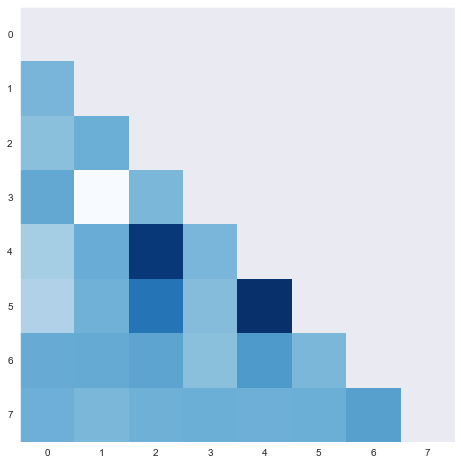

In [97]:
plt.figure(figsize = (10,8))
# 取2-13列列名
colnm = studio_merge_df.columns.tolist()[0:13]
# 计算列与列之间的相关性矩阵
mcorr = studio_merge_df[colnm].corr()
# 生成与列相关性矩阵行列数一样的全0矩阵
np.ones_like(mcorr, dtype=np.bool_)
mask = np.triu(np.ones_like(mcorr, dtype=np.bool_))
mcorr[mask] = np.nan
mcorr
# 将上三角矩阵设置为1
plt.imshow(mcorr,cmap='Blues')
# 可以看到有一些绝对值大的相关性列